In [137]:
!pip install duckdb
!pip install xgboost

     -------------------------------------- 99.8/99.8 MB 369.8 kB/s eta 0:00:00


In [568]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [569]:
df = pd.read_csv('Salary Data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [570]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


# Clean Missing Values

2 records are missing

In [571]:
df[df['Age'].isnull()] # Drop


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [572]:
df = df.dropna()
df.count()

Age                    373
Gender                 373
Education Level        373
Job Title              373
Years of Experience    373
Salary                 373
dtype: int64

In [573]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


# EDA

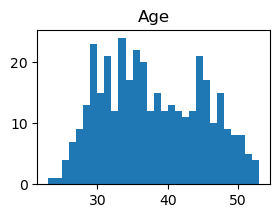

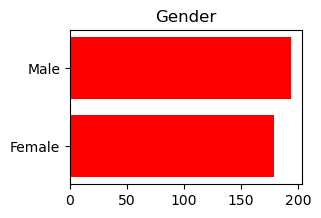

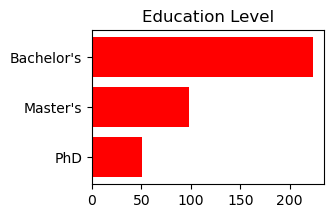

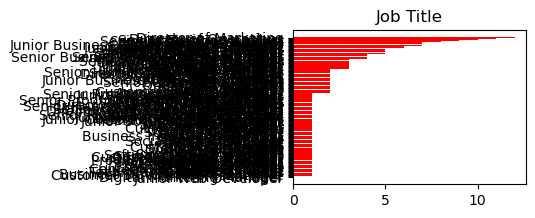

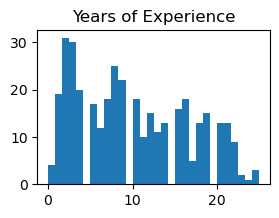

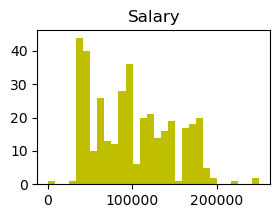

In [574]:
def univariate(df):
    cols  = df.columns
    dtype = [str(df[col].dtypes) for col in df.columns]
    
    def num_plot(df, col):
        plt.figure(figsize = (3,2))
        if col == 'Salary':
            plt.hist(df[col], bins = 30, color = 'y')
        else:
            plt.hist(df[col], bins = 30)
        plt.title(col)
        plt.show()
    
    def cat_plot(df, col):
        plt.figure(figsize = (3,2))
        tmp = df[col].value_counts()
        plt.barh(tmp.keys()[::-1], tmp[::-1], color = 'r')
        plt.title(col)
        plt.show()
    
    for i in range(len(cols)):
        if 'float' in dtype[i] or 'int' in dtype[i]:
            num_plot(df, cols[i])
        else:
            cat_plot(df, cols[i])
            
univariate(df)

**Age**
- Data seems to be normal

**Gender**
- Both male and female are equal proportion

**Education Level**
- Most of people has Bachelor's Degree

**Job Title**
- Seems to be diverse need to explore more

**YOE**
- Data seems to be normal

**Salary**
- Data seems to be right skew
- Most of people stuck in salary < 100000

<AxesSubplot:xlabel='Years of Experience', ylabel='Age'>

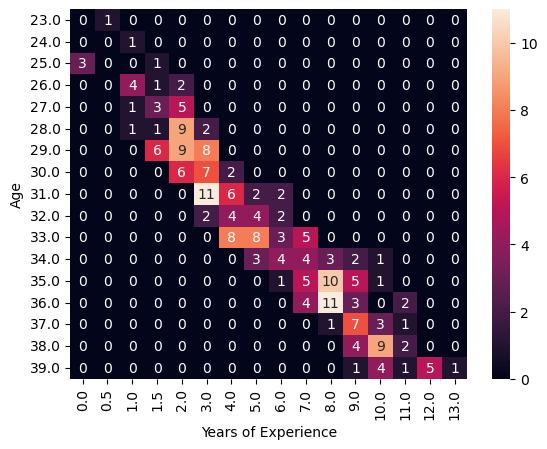

In [575]:
# Just want to see if data has error on YOE and age
# E.g. Age 23 but YOE = 10

# Result shows no error

sns.heatmap(pd.crosstab(df.query('Age < 40')['Age'], df.query('Age < 40')['Years of Experience']), annot = True)

## Explore Job Title

- Create word cloud to see relationship of each word

In [31]:
df['Job Title']

0                  Software Engineer
1                       Data Analyst
2                     Senior Manager
3                    Sales Associate
4                           Director
                   ...              
370         Senior Marketing Analyst
371           Director of Operations
372           Junior Project Manager
373    Senior Operations Coordinator
374          Senior Business Analyst
Name: Job Title, Length: 375, dtype: object

In [33]:
!pip install wordcloud

     ------------------------------------ 300.6/300.6 kB 422.0 kB/s eta 0:00:00


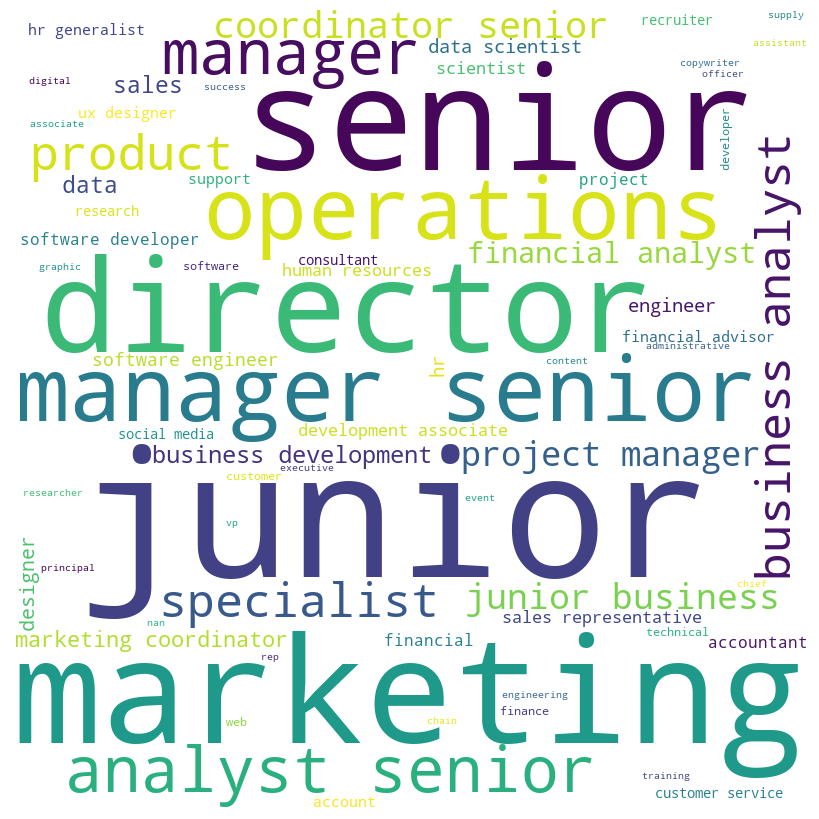

In [36]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words = ''
stopwords = set(STOPWORDS)
for val in df['Job Title']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
 

# a = WordCloud(width = 800, height = 800,
#                 background_color ='white',
#                 stopwords = stopwords,
#                 min_font_size = 10).generate(comment_words)
wordcloud =  WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

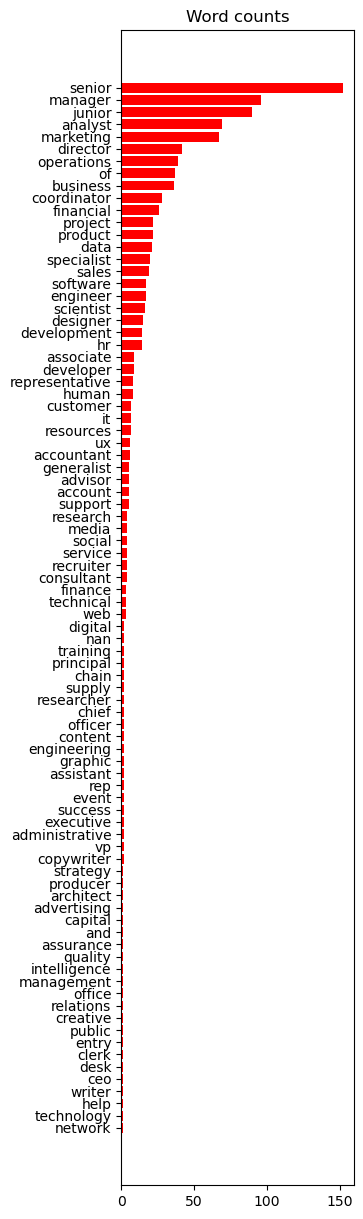

In [47]:
list_of_words = pd.DataFrame({'low' : comment_words.split()})
tmp = list_of_words['low'].value_counts()
plt.figure(figsize = (3,15))
plt.barh(tmp.keys()[::-1], tmp[::-1], color = 'r')
plt.title('Word counts')
plt.show()

### Explore High Salary

In [54]:
high = df.groupby('Job Title')[['Salary']].mean('Salary').sort_values(by = 'Salary', ascending = False).head(60)
list_title_high = high.index
high

,Salary
Job Title,
CEO,250000.000000
Chief Technology Officer,250000.000000
Chief Data Officer,220000.000000
VP of Finance,200000.000000
Director,200000.000000
Operations Director,190000.000000
VP of Operations,190000.000000
Research Director,190000.000000
Director of Human Resources,187500.000000


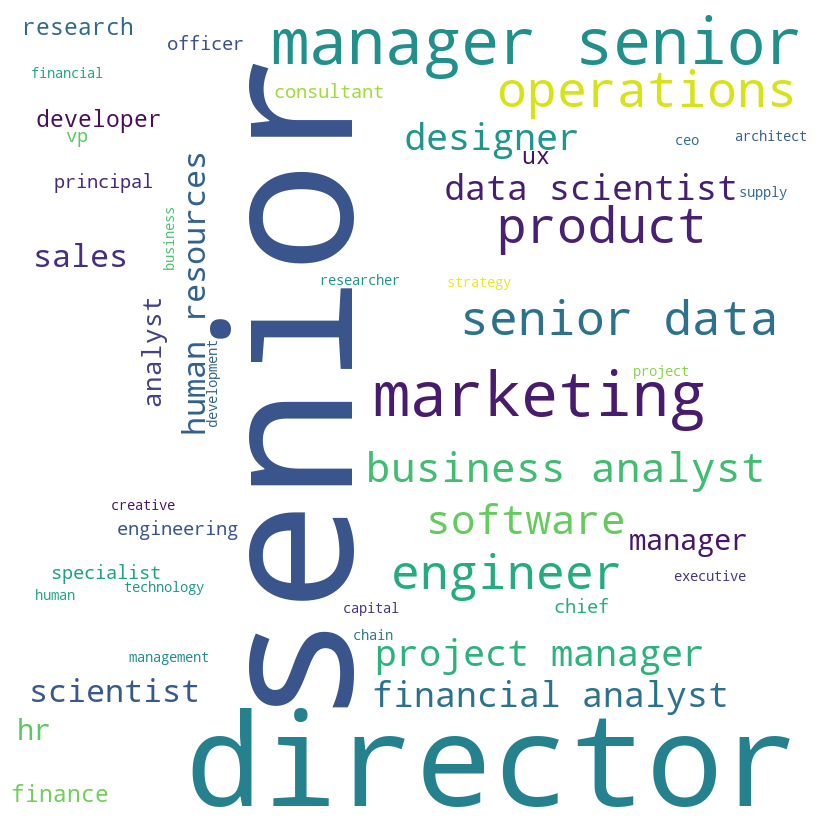

In [57]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words = ''
stopwords = set(STOPWORDS)
for val in df[df['Job Title'].isin(high.index)]['Job Title']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
 

# a = WordCloud(width = 800, height = 800,
#                 background_color ='white',
#                 stopwords = stopwords,
#                 min_font_size = 10).generate(comment_words)
wordcloud =  WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

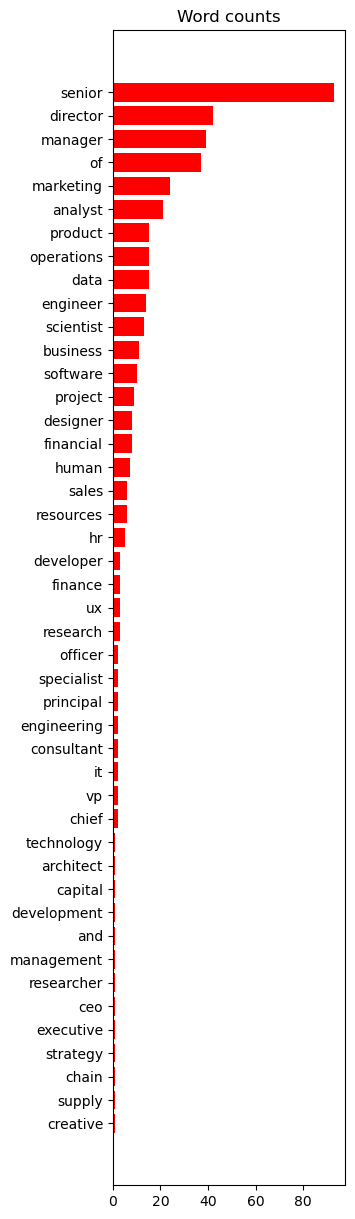

In [58]:
list_of_words = pd.DataFrame({'low' : comment_words.split()})
tmp = list_of_words['low'].value_counts()
plt.figure(figsize = (3,15))
plt.barh(tmp.keys()[::-1], tmp[::-1], color = 'r')
plt.title('Word counts')
plt.show()

**Position**
- Senior
- Director
- Manager 
- Officer
- Specialist
- Principal
- VP
- Chief
- CEO
- Executive

**Role**
- Marketing
- Analyst
- Product
- Operations
- Data
- Engineer
- Scientist
- Business
- Software
- Project
- Designer
- Financial
- Human
- Sales
- Resources
- HR
- Developer
- Finance
- UX
- Research
- Engineering
- Consultant
- IT

### Explore Low Salary

In [576]:
low = df.groupby('Job Title')[['Salary']].mean('Salary').sort_values(by = 'Salary', ascending = False).tail(60)
list_title_low = low.index
low

,Salary
Job Title,
Recruiter,65000.000000
Junior Financial Advisor,65000.000000
Junior Marketing Manager,60000.000000
IT Support Specialist,60000.000000
Junior Data Analyst,60000.000000
Network Engineer,60000.000000
Junior Product Manager,56250.000000
Accountant,55000.000000
Social Media Manager,55000.000000


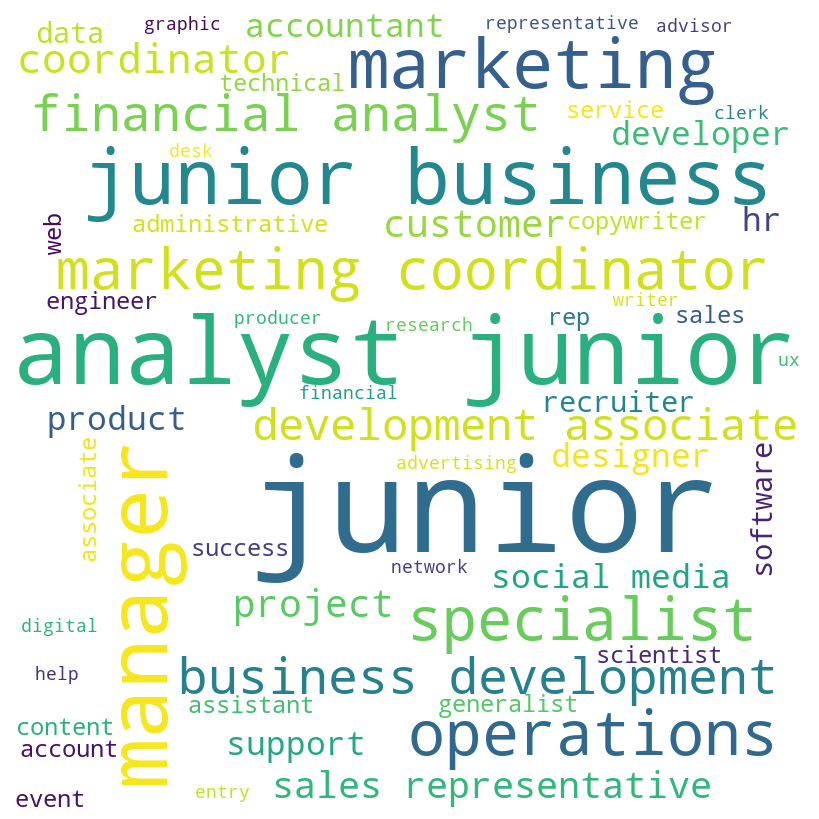

In [577]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words = ''
stopwords = set(STOPWORDS)
for val in df[df['Job Title'].isin(low.index)]['Job Title']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
 

# a = WordCloud(width = 800, height = 800,
#                 background_color ='white',
#                 stopwords = stopwords,
#                 min_font_size = 10).generate(comment_words)
wordcloud =  WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

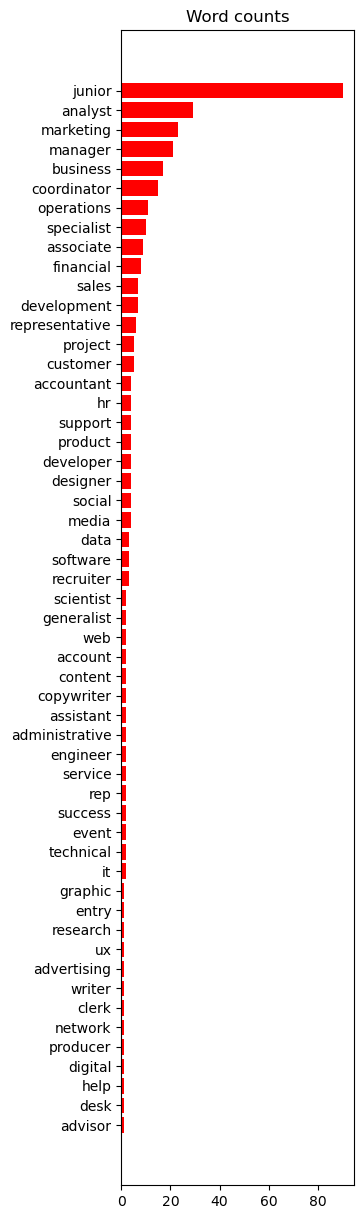

In [578]:
list_of_words = pd.DataFrame({'low' : comment_words.split()})
tmp = list_of_words['low'].value_counts()
plt.figure(figsize = (3,15))
plt.barh(tmp.keys()[::-1], tmp[::-1], color = 'r')
plt.title('Word counts')
plt.show()

**Position**
- Junior
- Manager
- Associate

**Role**
- Analyst
- Marketing
- Business
- Coordinator
- Operations
- Specialist
- Financial
- Sales
- Development
- Project
- Customer
- Accountant 
- HR
- Support
- Product
- Developer
- Designer
- Social
- Media
- Software
- Recruiter
- Generalist
- Web
- Account
- Content
- Copywriter
- Assistant
- Administrative
- Engineer
- Service

In [579]:
# Postion
positions = ['senior', 'director', 'manager', 'officer', 'specialist', 'principal', 'vp', 'chief', 'ceo', 'executive',
            'junior', 'manager', 'associate']
roles = ['marketing', 'analyst', 'product', 'operations', 'data', 'engineer', 'scientist', 'business', 'software', 
        'project', 'designer', 'financial', 'human', 'sales', 'resources', 'hr', 'developer', 'finance',
       'ux', 'research', 'engineering', 'consultant', 'it', 'analyst', 'marketing', 'business', 'coordinator', 
        'operations', 'financial', 'sales', 'development', 'project', 'customer', 'accountant', 'hr', 'support', 'product',
       'developer', 'designer', 'social', 'media', 'software', 'recruiter', 'web', 'account', 'content', 'copywriter',
       'assistant', 'administrative', 'engineer', 'service']

positions, roles = list(set(positions)), list(set(roles)) # Drop dup word

In [580]:
print(positions)
print(roles)

['chief', 'manager', 'junior', 'senior', 'officer', 'director', 'ceo', 'associate', 'specialist', 'vp', 'executive', 'principal']
['customer', 'engineering', 'finance', 'development', 'web', 'content', 'data', 'marketing', 'social', 'recruiter', 'analyst', 'business', 'coordinator', 'operations', 'accountant', 'hr', 'financial', 'software', 'scientist', 'resources', 'research', 'human', 'it', 'service', 'support', 'consultant', 'assistant', 'ux', 'media', 'administrative', 'copywriter', 'product', 'engineer', 'sales', 'developer', 'account', 'project', 'designer']


In [581]:
df.head(3)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0


In [589]:
for pos in positions:
    df[f'p_{pos}'] = np.where(df['Job Title'].str.lower().str.contains(pos), 1, 0)

for role in roles:
    df[f'r_{role}'] = np.where(df['Job Title'].str.lower().str.contains(role), 1, 0)

df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,p_chief,p_manager,p_junior,p_senior,...,r_media,r_administrative,r_copywriter,r_product,r_engineer,r_sales,r_developer,r_account,r_project,r_designer
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,52.0,Male,Master's,Director,20.0,200000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [590]:
df[['p_chief', 'p_manager', 'p_junior', 'Salary']].groupby(['p_chief', 'p_manager', 'p_junior']).mean('Salary')

Salary
p_chief p_manager p_junior               
0       0         0         117684.729064
                  1          46185.416667
        1         0         113846.153846
                  1          52777.777778
1       0         0         235000.000000

In [106]:
df['Gender'].astype('category').cat.codes

0      0
1      1
2      2
3      0
4      1
      ..
370    0
371    1
372    0
373    0
374    2
Length: 373, dtype: int8

In [133]:
corr = pd.DataFrame()

print(len(df.columns))
for col in df.columns:
    if col != "Salary" :
        try:
            cor = np.round(np.corrcoef(df[col], df['Salary'])[1,0], 4)
        except:
            cor = np.round(np.corrcoef(df[col].astype('category').cat.codes, df['Salary'])[1,0], 4)
        corr = pd.concat([corr, pd.DataFrame({'feature' : [col], 'correlation' : [cor], 'abs_correlation' : [np.abs(cor)]})], 
                         ignore_index = True)
corr = corr.sort_values(by = 'abs_correlation', ascending = False)

30


In [851]:
corr[~(corr['feature'].str.contains('_'))]

,feature,correlation,abs_correlation
4,Years of Experience,0.9303,0.9303
0,Age,0.9223,0.9223
2,Education Level,0.6704,0.6704
3,Job Title,0.1362,0.1362
1,Gender,0.0711,0.0711


In [134]:
corr

,feature,correlation,abs_correlation
4,Years of Experience,0.9303,0.9303
0,Age,0.9223,0.9223
2,Education Level,0.6704,0.6704
7,p_junior,-0.6213,0.6213
19,r_junior,-0.6213,0.6213
10,p_director,0.5547,0.5547
22,r_director,0.5547,0.5547
20,r_senior,0.3208,0.3208
8,p_senior,0.3208,0.3208
21,r_officer,0.2049,0.2049


# Train ML Model

## Create Utility Function

In [827]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from xgboost import XGBRegressor
import warnings

warnings.filterwarnings("ignore")

def split(df, columns, target = 'Salary'):
    
    X_train, X_test, y_train, y_test = train_test_split(df[columns], df[target], test_size = 0.2, random_state = 42)
    
    return X_train, X_test, y_train, y_test

def kfold_cv(X_train, X_test, y_train, y_test, name, model, k = 5):
    
    idxs = [int(X_train.shape[0]/k)*i for i in range(k+1)] # Assign index in k
    idxs = [idxs[i] if i != len(idxs) - 1 else X_train.shape[0] for i in range(len(idxs))]
    
    results = pd.DataFrame()
    
        
    val_rmse_all = []
    val_mse_all = []
    val_mae_all = []
    val_r2_all = []
        
    test_rmse_all = []
    test_mse_all = []
    test_mae_all = []
    test_r2_all = []
        
    for i in range(len(idxs)):
        if i != len(idxs) - 1:
            start_idx = idxs[i]
            end_idx   = idxs[i+1]
  
            X_train_fold = pd.concat([X_train.iloc[:start_idx], X_train.iloc[end_idx:]])
            X_val_fold   = X_train.iloc[start_idx:end_idx]

            y_train_fold = pd.concat([y_train.iloc[:start_idx], y_train.iloc[end_idx:]])
            y_val_fold   = y_train.iloc[start_idx:end_idx]
                                          
            model.fit(X_train_fold, y_train_fold)
                
            y_pred_val = model.predict(X_val_fold)
            y_pred_test = model.predict(X_test)
                
            val_rmse_all.append(np.sqrt(mean_squared_error(y_val_fold, y_pred_val)))
            val_mse_all.append(mean_squared_error(y_val_fold, y_pred_val))
            val_mae_all.append(mean_absolute_error(y_val_fold, y_pred_val))
            val_r2_all.append(r2_score(y_val_fold, y_pred_val))
                
            test_rmse_all.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
            test_mse_all.append(mean_squared_error(y_test, y_pred_test))
            test_mae_all.append(mean_absolute_error(y_test, y_pred_test))
            test_r2_all.append(r2_score(y_test, y_pred_test))
        
    cv_result = pd.DataFrame({
        'name' : [name],
        'VAL_rmse' : [np.mean(val_rmse_all)],
        'VAL_mse' : [np.mean(val_mse_all)],
        'VAL_mae' : [np.mean(val_mae_all)],
        'VAL_r2' : [np.mean(val_r2_all)],
            
        'TEST_rmse' : [np.mean(test_rmse_all)],
        'TEST_mse' : [np.mean(test_mse_all)],
        'TEST_mae' : [np.mean(test_mae_all)],
        'TEST_r2' : [np.mean(test_r2_all)],
    })
    
        
    return cv_result
                
def select_best_model(X_train, X_test, y_train, y_test, columns, target = 'Salary'):
    
    results = {}
    models = {
                "Multiple Linear Regression": LinearRegression(),
                "Decision Tree Regressor": DecisionTreeRegressor(),
                "XGBoost": XGBRegressor(),
                "RandomForest": RandomForestRegressor()
             }
    
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    
    results = pd.DataFrame()
    
    for name, model in models.items():
        model_results = {}
        model_results['model'] = [name]
        
        cv_result = kfold_cv(X_train, X_test, y_train, y_test, name, model)
        
        results = pd.concat([results, cv_result], ignore_index = True)

    return [X_train, X_test, y_train, y_test], results.sort_values(by = ['TEST_r2', 'VAL_r2'], ascending = False)

def fine_tune(name, X_train, X_test, y_train, y_test, columns):
    if name == 'RandomForest':
        model = RandomForestRegressor()
        params = {
            'n_estimators' : [10, 20, 30, 40],
            'max_depth' : [5, 10, 20, 100],
            'min_samples_split' : [2, 5, 10]
        }
    elif name == 'XGBoost' : 
        model = XGBRegressor()
        params = {
            'max_depth': [5, 10, 20, 100],
            'n_estimators' : [10, 20, 30, 40],
            'learning_rate': [0.1, 0.08, 0.05],
            'subsample' : [0.5, 0.7, 1],
            'min_samples_split' : [2, 3, 5, 10],
            'colsample_bytree': [0.6, 0.8, 1.0],
          
        }
    elif name == 'Decision Tree Regressor':
        model = DecisionTreeRegressor()
        params = {
            'splitter' : ['best', 'random'],
            'max_depth' : [10, 20, 50],
            'min_samples_split' : [2, 5, 10]
        }
        
    g1 = GridSearchCV(model, params, cv=5, n_jobs=-1, scoring = 'r2')
        
    # conduct grid search over the parameter space

    g1.fit(X_train,y_train)

    # show best parameter configuration found for classifier
    cv_params1 = g1.best_params_
    cv_result = g1.cv_results_
    cv_result = pd.DataFrame({
        'params' : cv_result['params'],
        'score' : cv_result['mean_test_score'],
        'rank_test_score' : cv_result['rank_test_score']
    })
    return cv_params1, cv_result.sort_values(by = 'rank_test_score')

## Approach 1 : Fit only features from raw dataframe

In [795]:
df_to_test

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,p_chief,p_manager,p_junior,p_senior,...,r_media,r_administrative,r_copywriter,r_product,r_engineer,r_sales,r_developer,r_account,r_project,r_designer
0,32.0,1,0,159,5.0,90000.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,28.0,0,1,17,3.0,65000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45.0,1,2,130,15.0,150000.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,36.0,0,0,101,7.0,60000.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,52.0,1,1,22,20.0,200000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,35.0,0,0,131,8.0,85000.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
371,43.0,1,1,30,19.0,170000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372,29.0,0,0,70,2.0,40000.0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
373,34.0,1,0,137,7.0,90000.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [796]:
columns = ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']
df_to_test = df.copy()

for col in ['Gender', 'Education Level', 'Job Title']:
    df_to_test[col] = df_to_test[col].astype('category').cat.codes

X_train, X_test, y_train, y_test = split(df_to_test, columns)
df_result, model_result = select_best_model(X_train, X_test, y_train, y_test, columns, target = 'Salary')

print(columns)
model_result

['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']


,name,VAL_rmse,VAL_mse,VAL_mae,VAL_r2,TEST_rmse,TEST_mse,TEST_mae,TEST_r2
3,RandomForest,15123.106100,2.321753e+08,9526.347954,0.896997,13560.390578,1.863549e+08,9223.129133,0.922274
2,XGBoost,15579.473738,2.487565e+08,9473.608085,0.889776,13990.051150,1.971565e+08,9388.186224,0.917769
0,Multiple Linear Regression,15586.986507,2.450372e+08,11627.415623,0.891992,15844.275367,2.513321e+08,11008.822792,0.895173
1,Decision Tree Regressor,18662.896917,3.502599e+08,10650.943138,0.844986,17100.116046,3.018675e+08,10412.400000,0.874095


In [797]:
X_train, X_test, y_train, y_test = df_result[0], df_result[1], df_result[2], df_result[3]

params, res = fine_tune('RandomForest', X_train, X_test, y_train, y_test, columns)
res.head(5)

,params,score,rank_test_score
44,"{'max_depth': 100, 'min_samples_split': 10, 'n...",0.918704,1
43,"{'max_depth': 100, 'min_samples_split': 5, 'n_...",0.912049,2
42,"{'max_depth': 100, 'min_samples_split': 5, 'n_...",0.909575,3
19,"{'max_depth': 10, 'min_samples_split': 5, 'n_e...",0.909402,4
23,"{'max_depth': 10, 'min_samples_split': 10, 'n_...",0.909229,5


In [798]:
params

{'max_depth': 100, 'min_samples_split': 10, 'n_estimators': 10}

In [800]:
model = RandomForestRegressor(**params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Train R2")
print(r2_score(y_train, model.predict(X_train)))
print("Test R2")
print(r2_score(y_test, y_pred))

Train R2
0.972674895558931
Test R2
0.9083416748330249


## Approach 2 : Fit on all features include created ones

In [828]:
columns = ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience'] +\
          [i for i in df.columns if i.startswith('p_') or i.startswith('r_')]
df_to_test = df.copy()

for col in ['Gender', 'Education Level', 'Job Title']:
    df_to_test[col] = df_to_test[col].astype('category').cat.codes

X_train, X_test, y_train, y_test = split(df_to_test, columns)
df_result, model_result = select_best_model(X_train, X_test, y_train, y_test, columns, target = 'Salary')

print(columns)
print(len(columns))
model_result

['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'p_chief', 'p_manager', 'p_junior', 'p_senior', 'p_officer', 'p_director', 'p_ceo', 'p_associate', 'p_specialist', 'p_vp', 'p_executive', 'p_principal', 'r_customer', 'r_engineering', 'r_finance', 'r_development', 'r_web', 'r_content', 'r_data', 'r_marketing', 'r_social', 'r_recruiter', 'r_analyst', 'r_business', 'r_coordinator', 'r_operations', 'r_accountant', 'r_hr', 'r_financial', 'r_software', 'r_scientist', 'r_resources', 'r_research', 'r_human', 'r_it', 'r_service', 'r_support', 'r_consultant', 'r_assistant', 'r_ux', 'r_media', 'r_administrative', 'r_copywriter', 'r_product', 'r_engineer', 'r_sales', 'r_developer', 'r_account', 'r_project', 'r_designer']
55


,name,VAL_rmse,VAL_mse,VAL_mae,VAL_r2,TEST_rmse,TEST_mse,TEST_mae,TEST_r2
2,XGBoost,14817.304580,2.232257e+08,9491.945432,0.899889,14436.191034,2.108646e+08,9642.504531,0.912051
3,RandomForest,14048.330123,1.989071e+08,8978.981378,0.911613,14699.410972,2.172931e+08,9375.909067,0.909370
0,Multiple Linear Regression,12036.576861,1.475053e+08,8760.910481,0.934591,18627.405972,3.477738e+08,10430.182839,0.854948
1,Decision Tree Regressor,18895.033072,3.640775e+08,11027.925096,0.840531,19310.646213,3.810667e+08,11493.333333,0.841062


In [829]:
df_to_test = df.copy()
X_train, X_test, y_train, y_test = split(df_to_test, columns)

X_train, X_test, y_train, y_test = df_result[0], df_result[1], df_result[2], df_result[3]

params, res = fine_tune('XGBoost', X_train, X_test, y_train, y_test, columns)
res.head(5)

,params,score,rank_test_score
47,"{'colsample_bytree': 0.6, 'learning_rate': 0.1...",0.937245,1
35,"{'colsample_bytree': 0.6, 'learning_rate': 0.1...",0.937245,1
11,"{'colsample_bytree': 0.6, 'learning_rate': 0.1...",0.937245,1
23,"{'colsample_bytree': 0.6, 'learning_rate': 0.1...",0.937245,1
34,"{'colsample_bytree': 0.6, 'learning_rate': 0.1...",0.936909,5


In [830]:
params

{'colsample_bytree': 0.6,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 40,
 'subsample': 1}

In [831]:
model = XGBRegressor(**params)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("Train R2")
print(r2_score(y_train, y_train_pred))
print("Test R2")
print(r2_score(y_test, y_pred))

Train R2
0.9876649007852757
Test R2
0.9087957072866096


## Approach X

In [861]:
columns = ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience'] +\
          [i for i in df.columns if i.startswith('p_')]
df_to_test = df.copy()

for col in ['Gender', 'Education Level', 'Job Title']:
    df_to_test[col] = df_to_test[col].astype('category').cat.codes

X_train, X_test, y_train, y_test = split(df_to_test, columns)
df_result, model_result = select_best_model(X_train, X_test, y_train, y_test, columns, target = 'Salary')

print(columns)
print(len(columns))
model_result

['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'p_chief', 'p_manager', 'p_junior', 'p_senior', 'p_officer', 'p_director', 'p_ceo', 'p_associate', 'p_specialist', 'p_vp', 'p_executive', 'p_principal']
17


,name,VAL_rmse,VAL_mse,VAL_mae,VAL_r2,TEST_rmse,TEST_mse,TEST_mae,TEST_r2
2,XGBoost,14053.485752,2.032784e+08,8688.453350,0.909455,14075.448715,2.017145e+08,9342.360203,0.915868
3,RandomForest,14043.965324,1.998338e+08,8955.283427,0.910816,15452.063366,2.414353e+08,9701.071067,0.899301
0,Multiple Linear Regression,11681.655510,1.390419e+08,8447.956465,0.938114,18781.332261,3.529948e+08,10209.088688,0.852771
1,Decision Tree Regressor,18304.159190,3.388055e+08,10466.142701,0.850103,19624.031611,3.899342e+08,11732.400000,0.837364


In [862]:
X_train, X_test, y_train, y_test = df_result[0], df_result[1], df_result[2], df_result[3]

params, res = fine_tune('XGBoost', X_train, X_test, y_train, y_test, columns)
res.head(5)

,params,score,rank_test_score
23,"{'colsample_bytree': 0.6, 'learning_rate': 0.1...",0.937588,1
35,"{'colsample_bytree': 0.6, 'learning_rate': 0.1...",0.937588,1
47,"{'colsample_bytree': 0.6, 'learning_rate': 0.1...",0.937588,1
11,"{'colsample_bytree': 0.6, 'learning_rate': 0.1...",0.937588,1
621,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.936185,5


In [863]:
model = XGBRegressor(**params)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("Train R2")
print(r2_score(y_train, y_train_pred))
print("Test R2")
print(r2_score(y_test, y_pred))

Train R2
0.985483853205301
Test R2
0.9034441779709064


## Approach 3 : Approach 2 but exclude low correlated features

- Select only correlation > 0.6

In [857]:
corr = pd.DataFrame()

print(len(df.columns))
for col in df.columns:
    if col != "Salary" :
        try:
            cor = np.round(np.corrcoef(df[col], df['Salary'])[1,0], 4)
        except:
            cor = np.round(np.corrcoef(df[col].astype('category').cat.codes, df['Salary'])[1,0], 4)
        corr = pd.concat([corr, pd.DataFrame({'feature' : [col], 'correlation' : [cor], 'abs_correlation' : [np.abs(cor)]})], 
                         ignore_index = True)
corr = corr.sort_values(by = 'abs_correlation', ascending = False)
columns = corr[corr['abs_correlation'] > 0.5]['feature'].tolist()
print(len(columns))
corr

56
5


,feature,correlation,abs_correlation
4,Years of Experience,0.9303,0.9303
0,Age,0.9223,0.9223
2,Education Level,0.6704,0.6704
7,p_junior,-0.6213,0.6213
10,p_director,0.5547,0.5547
8,p_senior,0.3208,0.3208
5,p_chief,0.2049,0.2049
9,p_officer,0.2049,0.2049
27,r_analyst,-0.1941,0.1941
29,r_coordinator,-0.1893,0.1893


In [858]:
# columns = ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience'] +\
#           [i for i in df.columns if i.startswith('p_') or i.startswith('r_')]
df_to_test = df.copy()

for col in ['Gender', 'Education Level', 'Job Title']:
    df_to_test[col] = df_to_test[col].astype('category').cat.codes

X_train, X_test, y_train, y_test = split(df_to_test, columns)
df_result, model_result = select_best_model(X_train, X_test, y_train, y_test, columns, target = 'Salary')

print(columns)
model_result

['Years of Experience', 'Age', 'Education Level', 'p_junior', 'p_director']


,name,VAL_rmse,VAL_mse,VAL_mae,VAL_r2,TEST_rmse,TEST_mse,TEST_mae,TEST_r2
0,Multiple Linear Regression,14979.103185,2.287938e+08,10587.517120,0.899667,16224.126694,2.634680e+08,10275.542481,0.890111
3,RandomForest,16528.125754,2.755424e+08,10487.929365,0.878627,17924.809043,3.236475e+08,11069.587821,0.865011
2,XGBoost,17612.620703,3.136103e+08,10704.032344,0.861958,19099.266197,3.658226e+08,11547.439937,0.847420
1,Decision Tree Regressor,20416.212523,4.235737e+08,12064.831520,0.813682,20661.747489,4.291535e+08,12261.671958,0.821006


In [859]:
X_train, X_test, y_train, y_test = df_result[0], df_result[1], df_result[2], df_result[3]

params, res = fine_tune('RandomForest', X_train, X_test, y_train, y_test, columns)
res.head(5)

,params,score,rank_test_score
35,"{'max_depth': 20, 'min_samples_split': 10, 'n_...",0.892866,1
3,"{'max_depth': 5, 'min_samples_split': 2, 'n_es...",0.891538,2
7,"{'max_depth': 5, 'min_samples_split': 5, 'n_es...",0.891456,3
45,"{'max_depth': 100, 'min_samples_split': 10, 'n...",0.891081,4
2,"{'max_depth': 5, 'min_samples_split': 2, 'n_es...",0.890666,5


In [860]:
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("Train R2")
print(r2_score(y_train, y_train_pred))
print("Test R2")
print(r2_score(y_test, y_pred))

Train R2
0.9051565344926167
Test R2
0.8908425792038666


# Post Analysis on Approach 2

In [832]:
model = XGBRegressor(**params)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("Train R2")
print(r2_score(y_train, y_train_pred))
print("Test R2")
print(r2_score(y_test, y_pred))

Train R2
0.9876649007852757
Test R2
0.9087957072866096


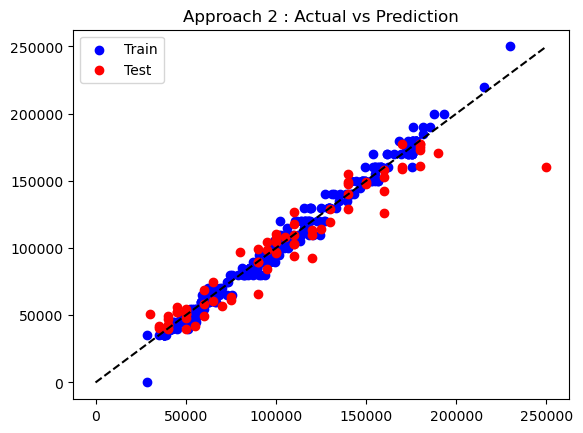

In [833]:
x = range(0, 250000)
plt.scatter(y_train_pred, y_train, color = 'b', label = 'Train')
plt.scatter(y_test, y_pred, color = 'r', label = 'Test')
plt.plot(x, x, color = 'black', linestyle = 'dashed')
plt.title('Approach 2 : Actual vs Prediction')
plt.legend()
plt.show()

In [834]:
r2_score(y_test[(y_test>100000) & (y_test < 170000)], y_pred[(y_test>100000) & (y_test < 170000)])

0.53241342468368

In [835]:
r2_score(y_test, y_pred)

0.9087957072866096

In [836]:
print(r2_score(y_test[X_test['Education Level'] == 0], y_pred[X_test['Education Level'] == 0])) # Bachelor's
print(r2_score(y_test[X_test['Education Level'] == 1], y_pred[X_test['Education Level'] == 1])) # Master's
print(r2_score(y_test[X_test['Education Level'] == 2], y_pred[X_test['Education Level'] == 2])) # PhD

0.8350969345065218
0.967500186252011
0.630969218219535


(224, 56)
(98, 56)
(51, 56)


<AxesSubplot:xlabel='Education Level', ylabel='Salary'>

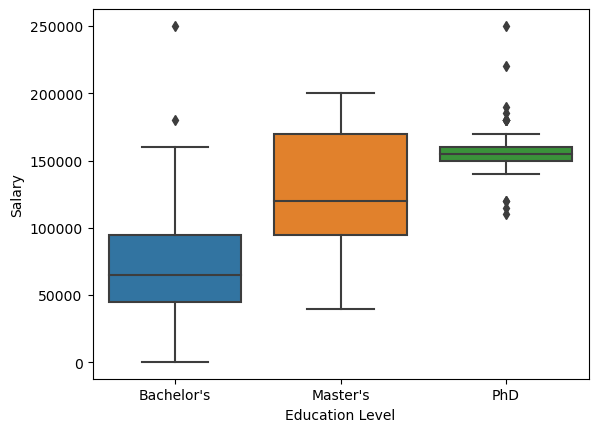

In [837]:
import seaborn as sns

print(df[df['Education Level'] == "Bachelor's"].shape)
print(df[df['Education Level'] == "Master's"].shape)
print(df[df['Education Level'] == "PhD"].shape)

sns.boxplot(data=df, x="Education Level", y="Salary")

## Approach 4 : Split model into 2 group
1. Education Level in ("Bachelor's", "Master's")
2. Education Level in ("PhD")

### Group 1

In [838]:
columns = ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience'] +\
          [i for i in df.columns if i.startswith('p_') or i.startswith('r_')]

df_grp_1 = df[df['Education Level'].isin(["Bachelor's", "Master's"])]

df_to_test = df_grp_1.copy()

for col in ['Gender', 'Education Level', 'Job Title']:
    df_to_test[col] = df_to_test[col].astype('category').cat.codes

X_train1, X_test1, y_train1, y_test1 = split(df_to_test, columns)
df_result, model_result = select_best_model(X_train1, X_test1, y_train1, y_test1, columns, target = 'Salary')

print(columns)
model_result

['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'p_chief', 'p_manager', 'p_junior', 'p_senior', 'p_officer', 'p_director', 'p_ceo', 'p_associate', 'p_specialist', 'p_vp', 'p_executive', 'p_principal', 'r_customer', 'r_engineering', 'r_finance', 'r_development', 'r_web', 'r_content', 'r_data', 'r_marketing', 'r_social', 'r_recruiter', 'r_analyst', 'r_business', 'r_coordinator', 'r_operations', 'r_accountant', 'r_hr', 'r_financial', 'r_software', 'r_scientist', 'r_resources', 'r_research', 'r_human', 'r_it', 'r_service', 'r_support', 'r_consultant', 'r_assistant', 'r_ux', 'r_media', 'r_administrative', 'r_copywriter', 'r_product', 'r_engineer', 'r_sales', 'r_developer', 'r_account', 'r_project', 'r_designer']


,name,VAL_rmse,VAL_mse,VAL_mae,VAL_r2,TEST_rmse,TEST_mse,TEST_mae,TEST_r2
3,RandomForest,13392.786567,1.932220e+08,8510.272043,0.903780,12162.493501,1.484201e+08,8699.887179,0.926404
0,Multiple Linear Regression,11944.050864,1.576175e+08,8513.593392,0.921556,12989.770037,1.687542e+08,10114.851472,0.916322
2,XGBoost,14075.662495,2.174462e+08,8792.478754,0.891883,13302.979718,1.791350e+08,9056.144706,0.911174
1,Decision Tree Regressor,17884.336682,3.447355e+08,10079.911210,0.830938,15760.519836,2.601634e+08,9794.615385,0.870995


In [839]:
X_train1, X_test1, y_train1, y_test1 = df_result[0], df_result[1], df_result[2], df_result[3]

params, res = fine_tune('RandomForest', X_train1, X_test1, y_train1, y_test1, columns)
res.head(5)

,params,score,rank_test_score
17,"{'max_depth': 10, 'min_samples_split': 5, 'n_e...",0.905326,1
14,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",0.901981,2
29,"{'max_depth': 20, 'min_samples_split': 5, 'n_e...",0.900595,3
39,"{'max_depth': 100, 'min_samples_split': 2, 'n_...",0.898936,4
12,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",0.898477,5


In [840]:
model = RandomForestRegressor(**params)
model.fit(X_train1, y_train1)
y_train_pred1 = model.predict(X_train1)
y_pred1 = model.predict(X_test1)

print("Train R2")
print(r2_score(y_train1, y_train_pred1))
print("Test R2")
print(r2_score(y_test1, y_pred1))

Train R2
0.9785467786884566
Test R2
0.9248469305320094


In [841]:
print(X_train1.shape)
print(X_test1.shape)

(257, 55)
(65, 55)


### Group 2

In [842]:
columns = ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience'] +\
          [i for i in df.columns if i.startswith('p_') or i.startswith('r_')]

df_grp_2 = df[~df['Education Level'].isin(["Bachelor's", "Master's"])]

df_to_test = df_grp_2.copy()

for col in ['Gender', 'Education Level', 'Job Title']:
    df_to_test[col] = df_to_test[col].astype('category').cat.codes

X_train2, X_test2, y_train2, y_test2 = split(df_to_test, columns)
df_result, model_result = select_best_model(X_train2, X_test2, y_train2, y_test2, columns, target = 'Salary')

print(columns)
model_result

['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'p_chief', 'p_manager', 'p_junior', 'p_senior', 'p_officer', 'p_director', 'p_ceo', 'p_associate', 'p_specialist', 'p_vp', 'p_executive', 'p_principal', 'r_customer', 'r_engineering', 'r_finance', 'r_development', 'r_web', 'r_content', 'r_data', 'r_marketing', 'r_social', 'r_recruiter', 'r_analyst', 'r_business', 'r_coordinator', 'r_operations', 'r_accountant', 'r_hr', 'r_financial', 'r_software', 'r_scientist', 'r_resources', 'r_research', 'r_human', 'r_it', 'r_service', 'r_support', 'r_consultant', 'r_assistant', 'r_ux', 'r_media', 'r_administrative', 'r_copywriter', 'r_product', 'r_engineer', 'r_sales', 'r_developer', 'r_account', 'r_project', 'r_designer']


,name,VAL_rmse,VAL_mse,VAL_mae,VAL_r2,TEST_rmse,TEST_mse,TEST_mae,TEST_r2
3,RandomForest,13251.622468,2.258285e+08,8655.000000,0.542384,11719.617709,1.499083e+08,7617.272727,0.680653
0,Multiple Linear Regression,16320.329857,2.905883e+08,11716.234389,0.347582,11994.522328,1.555094e+08,8745.564334,0.668721
1,Decision Tree Regressor,17584.671598,3.743750e+08,10875.000000,0.192979,14932.563988,2.359091e+08,8454.545455,0.497447
2,XGBoost,15892.122360,3.020928e+08,9526.803125,0.333679,17390.597942,3.099168e+08,10548.141193,0.339790


In [843]:
X_train2, X_test2, y_train2, y_test2 = df_result[0], df_result[1], df_result[2], df_result[3]

params, res = fine_tune('RandomForest', X_train2, X_test2, y_train2, y_test2, columns)
res.head(5)

,params,score,rank_test_score
44,"{'max_depth': 100, 'min_samples_split': 10, 'n...",0.592955,1
40,"{'max_depth': 100, 'min_samples_split': 5, 'n_...",0.556152,2
41,"{'max_depth': 100, 'min_samples_split': 5, 'n_...",0.550112,3
16,"{'max_depth': 10, 'min_samples_split': 5, 'n_e...",0.548839,4
19,"{'max_depth': 10, 'min_samples_split': 5, 'n_e...",0.547056,5


In [844]:
model = RandomForestRegressor(**params)
model.fit(X_train2, y_train2)
y_train_pred2 = model.predict(X_train2)
y_pred2 = model.predict(X_test2)

print("Train R2")
print(r2_score(y_train2, y_train_pred2))
print("Test R2")
print(r2_score(y_test2, y_pred2))

Train R2
0.890182855155304
Test R2
0.8315471791943467


In [845]:
print(X_train2.shape)
print(X_test2.shape)

(40, 55)
(11, 55)


In [846]:
y_train_pred1

array([ 50490.69800813,  78946.42857143,  37320.83333333,  48568.17469811,
        39351.22779519,  38100.5952381 ,  36320.83333333, 117902.97619048,
        97734.72222222,  84769.54365079,  55143.12770563,  39976.22779519,
       153895.83333333,  35790.18883415,  61841.17063492,  35790.18883415,
        47686.27217081,  49491.0643085 ,  84769.54365079,  48751.48097517,
       107696.42857143,  52276.73696917,  92726.38888889,  65672.65037594,
        69114.61038961,  49878.37301587,  49061.02756892,  92757.14285714,
        60211.01190476,  35546.42857143, 171283.33333333, 117434.52380952,
        99599.68434343, 117311.01190476, 111563.0952381 , 121877.43506494,
       130013.0952381 ,  93773.51190476,  39976.22779519, 131960.11904762,
        40990.51350948,  81802.38095238,  92012.1031746 , 112652.97619048,
       191572.02380952,  84769.54365079,  42923.61111111,  44676.51515152,
        91951.60533911,  92806.25      ,  58607.52829042,  39976.22779519,
       108671.42857143,  

### Merge

In [847]:
y_train_all = pd.concat([y_train1, y_train2])
y_test_all = pd.concat([y_test1, y_test2])
y_train_pred_all = np.concatenate([y_train_pred1, y_train_pred2])
y_pred_all = np.concatenate([y_pred1, y_pred2])

print("Train R2")
print(r2_score(y_train_all, y_train_pred_all))
print("Test R2")
print(r2_score(y_test_all, y_pred_all))


Train R2
0.9802877353674511
Test R2
0.9419084286512842


In [848]:
print(r2_score(y_test1[X_test1['Education Level'] == 0], y_pred1[X_test1['Education Level'] == 0])) # Bachelor's
print(r2_score(y_test1[X_test1['Education Level'] == 1], y_pred1[X_test1['Education Level'] == 1])) # Master's
print(r2_score(y_test2, y_pred2)) # PhD

0.8936195819750697
0.8335939008788111
0.8315471791943467


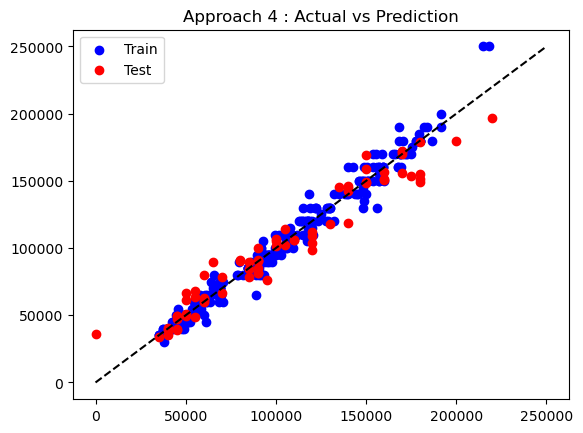

In [850]:
x = range(0, 250000)
plt.scatter(y_train_pred_all, y_train_all, color = 'b', label = 'Train')
plt.scatter(y_test_all, y_pred_all, color = 'r', label = 'Test')
plt.plot(x, x, color = 'black', linestyle = 'dashed')
plt.title('Approach 4 : Actual vs Prediction')
plt.legend()
plt.show()